This is a copy of the video commands and others to be found later that may come in handy for project

References / links

Chess & Stockfish integration https://www.youtube.com/watch?v=iEaU__JdI7c

Chess Blunder Detection and Using a PGN Database https://www.youtube.com/watch?v=u2-ydOlWZU4

Puzzle dataset https://www.kaggle.com/code/tianmin/starter-lichess-chess-puzzle-data


################################################################################################### ################################################################################################### ###################################################################################################

Chess and Lichess basic functions

In [1]:

import chess

board = chess.Board()

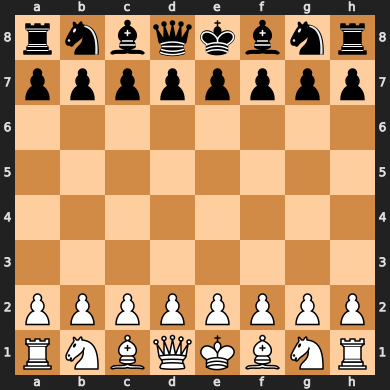

In [4]:
board

In [400]:
import os
from stockfish import Stockfish

In [48]:
path = os.getcwd()+"\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe"
stockfish = Stockfish(path=path)

In [51]:
# centipawns Positive is advantage white, negative is advantage black
stockfish.get_evaluation()

{'type': 'cp', 'value': 31}

In [53]:
# to interface with chess board
stockfish.set_fen_position(board.fen())

Exception ignored in: <function Stockfish.__del__ at 0x000001E9D11E6C10>
Traceback (most recent call last):
  File "C:\Users\Sadie\anaconda3\envs\learn\lib\site-packages\stockfish\models.py", line 757, in __del__
    if self._stockfish.poll() is None:
AttributeError: 'Stockfish' object has no attribute '_stockfish'


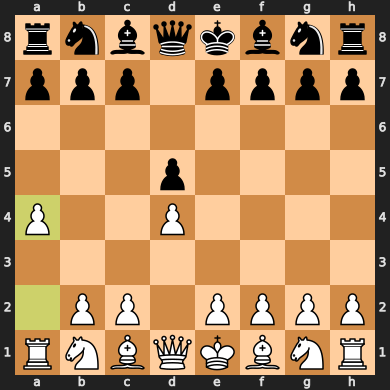

In [59]:
# to make a move
board.push_san("a2a4")
board

In [61]:
# top moves
stockfish.get_top_moves(10)

[{'Move': 'g1f3', 'Centipawn': 32, 'Mate': None},
 {'Move': 'd2d4', 'Centipawn': 30, 'Mate': None},
 {'Move': 'e2e4', 'Centipawn': 24, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 20, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': 18, 'Mate': None},
 {'Move': 'e2e3', 'Centipawn': 14, 'Mate': None},
 {'Move': 'c2c3', 'Centipawn': 3, 'Mate': None},
 {'Move': 'b1c3', 'Centipawn': 2, 'Mate': None},
 {'Move': 'a2a3', 'Centipawn': -6, 'Mate': None},
 {'Move': 'b2b3', 'Centipawn': -11, 'Mate': None}]

In [62]:
# time constraint
stockfish.get_best_move_time(1000)

'd2d4'

In [63]:
# is move correct
stockfish.is_move_correct('a2a3')

True

In [64]:
# set skill level
stockfish.set_skill_level(15)

###################################################################################################
###################################################################################################
###################################################################################################

Data reading for puzzle data set

In [2]:
import numpy as np 
import pandas as pd
import chess.svg
import sys

In [3]:
puzzles =  pd.read_csv('Data\\kaggle_lichess_puzzle_transformed.csv')


In [4]:
data = puzzles.copy()

In [75]:
puzzles.head(5)

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
0,0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48
1,1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53
2,2,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105
3,3,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1652,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69
4,4,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K...,e3g3 f7f4 e5f4 f8f4,1478,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81


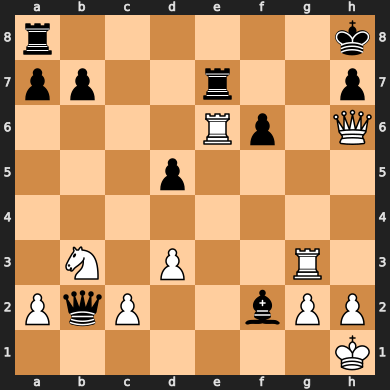

In [79]:
first_fen = puzzles['FEN'][0]
board = chess.Board(first_fen)
board

In [82]:
data.groupby(['Themes']).count().sort_values(['PuzzleId'], ascending = True).reset_index()[['Themes','PuzzleId']].head(10)

,Themes,PuzzleId
0,advancedPawn advantage attackingF2F7 attractio...,1
1,attraction clearance crushing fork long master...,1
2,attraction clearance crushing fork long master...,1
3,attraction clearance crushing fork interferenc...,1
4,attraction clearance crushing exposedKing midd...,1
5,attraction clearance crushing exposedKing midd...,1
6,attraction clearance crushing exposedKing mast...,1
7,attraction clearance crushing exposedKing long...,1
8,attraction clearance crushing exposedKing long...,1
9,attraction clearance crushing exposedKing king...,1


In [83]:
data = puzzles.sample(frac=0.001)

In [84]:
data.head(5)

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
2480540,2480540,xhwgW,2R2bk1/3nrp1p/6p1/8/q3P3/2Q2P2/6KP/5R2 b - - 3 37,d7b6 c8f8 g8f8 c3h8,1229,76,96,13920,attraction mate mateIn2 middlegame sacrifice s...,https://lichess.org/nI4PxYK4/black#74
1754878,1754878,gJnJw,6k1/6p1/7p/2p1p3/3bPpN1/5P1P/q1r3P1/1R3Q1K b -...,c2g2 b1b8 g8h7 f1g2,1577,75,91,734,advantage endgame intermezzo master short,https://lichess.org/nbjHJQiZ/black#90
1139248,1139248,RnzTt,1R6/5kp1/1Pp1pr1p/2Pp1q1b/5P2/4P3/5Q1P/5R1K w ...,b8d8 f6g6 f2g2 g6g2,1739,293,68,7,crushing endgame quietMove short,https://lichess.org/bcENe9um#69
1865269,1865269,ioLMV,1k6/pp6/8/2b5/8/1PP5/1P2QKRr/8 w - - 3 45,f2f1 h2h1 g2g1 h1g1,818,81,53,54,endgame mate mateIn2 short,https://lichess.org/X5Bn7JUF#89
2248684,2248684,s2x7a,3q2k1/pQ1P1ppp/1p6/8/5n2/8/PPr1R1PP/3R2K1 b - ...,c2e2 b7c8 f4e6 d1d6 e2e1 g1f2 e1c1 c8c1,2211,79,81,64,crushing endgame veryLong,https://lichess.org/icqutZfJ/black#46


In [91]:
data_pieces = data.head(1)

data_pieces

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
2480540,2480540,xhwgW,2R2bk1/3nrp1p/6p1/8/q3P3/2Q2P2/6KP/5R2 b - - 3 37,d7b6 c8f8 g8f8 c3h8,1229,76,96,13920,attraction mate mateIn2 middlegame sacrifice s...,https://lichess.org/nI4PxYK4/black#74


In [242]:
# https://stackoverflow.com/questions/55876336/is-there-a-way-to-convert-a-python-chess-board-into-a-list-of-integers

fen_test = list(puzzles['FEN'][0].split()[0])

board_array = []

for index, each in enumerate( fen_test):
    if each == 'p':
        board_array.append(1)
    elif each == 'P':
        board_array.append(-1)
    elif each == 'b':
        board_array.append(2)
    elif each == 'B':
        board_array.append(-2)
    elif each == 'n':
        board_array.append(3)
    elif each == 'N':
        board_array.append(-3)
    elif each == 'r':
        board_array.append(4)
    elif each == 'R':
        board_array.append(-4)
    elif each == 'q':
        board_array.append(5)
    elif each == 'Q':
        board_array.append(-5)
    elif each == 'k':
        board_array.append(6)
    elif each == 'K':
        board_array.append(-6)
    elif each.isdigit():
        for x in range(0, int(each)):
            board_array.append(0)

print(board_array)



[4, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, -4, 1, 0, -5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, -1, 0, 0, -4, 0, -1, 5, -1, 0, 0, 2, -1, -1, 0, 0, 0, 0, 0, 0, 0, -6]


In [263]:
len(board_array)

64

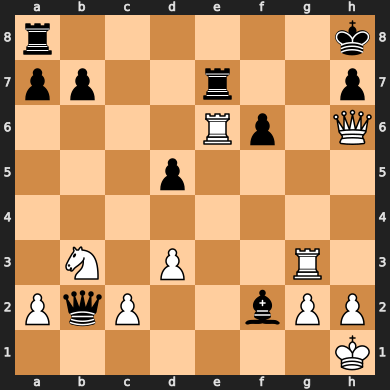

In [95]:
first_fen = puzzles['FEN'][0]
board = chess.Board(first_fen)
board

In [96]:
print(board)

r . . . . . . k
p p . . r . . p
. . . . R p . Q
. . . p . . . .
. . . . . . . .
. N . P . . R .
P q P . . b P P
. . . . . . . K


In [224]:
data = puzzles.sample(frac=0.002)
print(data['PuzzleId'].nunique())

5136


In [327]:
# testing single puzzle
pieces_list = []
squares_list = []
pieces_secondary_list = []


for each in range(0,3):
    fen = puzzles['FEN'][each]
    moves = puzzles['Moves'][each]
    board = chess.Board(fen)
    moves = moves.split()
    square = moves[0][:2]
    square2 = moves[0][2:4]
    x = ord(square[0]) - 96
    y = square[1]
    x2 = ord(square2[0]) - 96
    y2 = square2[1]
    print(x,y)
    print(8*(int(y)-1)+int(x))
    print(square)
    squares_list.append(8*(int(y)-1)+int(x))
    pieces_list.append(board.piece_at(chess.parse_square(square)).symbol().lower())
    print(moves)
    
    pieces_list_x = []    
    
    for index in range(1, len(moves)):
        board.push_san(moves[index-1])
        
        a_piece = moves[index][:2]
        
        if a_piece != None:
            print(board.piece_at(chess.parse_square(a_piece)))
            
            piece_symbol_x = board.piece_at(chess.parse_square(a_piece)).symbol()
            
            if piece_symbol_x == 'p':
                pieces_list_x.append(1)
            elif piece_symbol_x == 'P':
                pieces_list_x.append(-1)
            elif piece_symbol_x == 'b':
                pieces_list_x.append(2)
            elif piece_symbol_x == 'B':
                pieces_list_x.append(-2)
            elif piece_symbol_x == 'n':
                pieces_list_x.append(3)
            elif piece_symbol_x == 'N':
                pieces_list_x.append(-3)
            elif piece_symbol_x == 'r':
                pieces_list_x.append(4)
            elif piece_symbol_x == 'R':
                pieces_list_x.append(-4)
            elif piece_symbol_x == 'q':
                pieces_list_x.append(5)
            elif piece_symbol_x == 'Q':
                pieces_list_x.append(-5)
            elif piece_symbol_x == 'k':
                pieces_list_x.append(6)
            elif piece_symbol_x == 'K':
                pieces_list_x.append(-6)
            
    pieces_secondary_list.append(pieces_list_x)



6 2
14
f2
['f2g3', 'e6e7', 'b2b1', 'b3c1', 'b1c1', 'h6c1']
R
q
N
q
Q
[-4, 5, -3, 5, -5]
4 3
20
d3
['d3d6', 'f8d8', 'd6d8', 'f6d8']
r
Q
b
[4, -5, 2]
7 4
31
g4
['g4h5', 'g6h5', 'f4f5', 'e6e5', 'f5f6', 'e5f6']
p
P
k
P
k
[1, -1, 6, -1, 6]
[-4, 5, -3, 5, -5]
[4, -5, 2]
[1, -1, 6, -1, 6]


In [226]:
# find the piece and location 
pieces_list = []
squares_list = []

for each in range(0,data['PuzzleId'].nunique()):
    fen = puzzles['FEN'][each]
    moves = puzzles['Moves'][each]
    board = chess.Board(fen)
    moves = moves.split()
    square = moves[0][:2]
    x = ord(moves[0][:2][0]) - 96
    y = moves[0][:2][1]
    # finally the piece for the first move...
    #print(board.piece_at(chess.parse_square(square)).symbol())
    squares_list.append(square)
    pieces_list.append(board.piece_at(chess.parse_square(square)).symbol().lower())


In [227]:
data['first_piece'] = pieces_list
data['square'] = squares_list
data.head(5)

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,first_piece,square
1783602,1783602,gzFAW,r4b1r/5Qpp/p1k2n2/q2p4/4nB2/2p2N2/PP3PPP/R4RK1...,f8d6 f3d4 c6b6 b2c3,2291,86,76,80,crushing middlegame short,https://lichess.org/R4IxYen8/black#40,b,f2
334995,334995,8K4hF,8/7p/8/p1kpppp1/7P/PPK1PPP1/8/8 b - - 0 41,h7h6 f3f4 g5h4 g3h4 e5e4 h4h5 c5b5 c3d4 b5c6 d...,2535,99,69,47,crushing defensiveMove endgame pawnEndgame qui...,https://lichess.org/ZBb5ENjy/black#82,q,d3
2019551,2019551,m7nRn,1B6/6bp/p1k1KPp1/2P3P1/PP6/3p4/8/8 b - - 0 44,g7f6 g5f6 d3d2 f6f7 d2d1q f7f8q,1490,79,83,44,advancedPawn bishopEndgame crushing endgame ha...,https://lichess.org/lpqXk0le/black#88,p,g4
571255,571255,Dr3eZ,3kB3/5RQp/p7/2p5/2P5/1Nnp4/PP4PP/4q1K1 w - - 1 27,f7f1 c3e2 g1h1 e1f1,1101,230,100,16,deflection endgame mate mateIn2 short,https://lichess.org/G7UtyfPz#53,p,e5
2265181,2265181,sTRTU,2r5/2r1kp1p/pR4p1/N3p1b1/2P5/5PP1/PP4P1/3R2K1 ...,b2b4 g5e3 g1h2 e3b6,874,101,95,316,crushing endgame fork master masterVsMaster short,https://lichess.org/YYKWk9Iu#61,q,e3


In [228]:
test_data = data[['FEN','square']]
test_target = data[['first_piece']]

In [229]:
test_data.head(5)

,FEN,square
1783602,r4b1r/5Qpp/p1k2n2/q2p4/4nB2/2p2N2/PP3PPP/R4RK1...,f2
334995,8/7p/8/p1kpppp1/7P/PPK1PPP1/8/8 b - - 0 41,d3
2019551,1B6/6bp/p1k1KPp1/2P3P1/PP6/3p4/8/8 b - - 0 44,g4
571255,3kB3/5RQp/p7/2p5/2P5/1Nnp4/PP4PP/4q1K1 w - - 1 27,e5
2265181,2r5/2r1kp1p/pR4p1/N3p1b1/2P5/5PP1/PP4P1/3R2K1 ...,e3


In [230]:
# for pawns only...
new_pieces_list = pieces_list
for each in range(0, len(new_pieces_list)):
    if new_pieces_list[each] == 'p':
        new_pieces_list[each] = 1
    else:
        new_pieces_list[each] = 0

In [193]:
print(pieces_list)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [250]:
# convert FEN to int array 
# https://stackoverflow.com/questions/55876336/is-there-a-way-to-convert-a-python-chess-board-into-a-list-of-integers

#fen = data['FEN'][0]

data['FEN']

2384026    Q7/6pk/5pqp/2P1p3/5n2/3r2N1/1P3PPP/2R3K1 w - -...
1206453            8/5r2/1R6/1p1K4/5p2/P7/1P3k2/8 w - - 0 55
2119159           8/5k2/4N1p1/4b2p/8/1P5P/6P1/6K1 w - - 1 33
1662053    5rk1/2p2pp1/7p/p1q1n3/Br2Q3/7P/PPP2PP1/3R1RK1 ...
2161894    5r2/5pkp/pp4p1/2pP1b2/2P4q/7P/PQ4P1/3N1R1K b -...
                                 ...                        
664585     r2q1r2/1p2p1nk/p2p2p1/2pNb1Qp/4P3/P1PP3P/1P1N2...
103197     2r3k1/1p1Q1p1p/pq4pP/2r1p1P1/2n1P3/2P5/P1P5/K1...
1423805            6k1/6pp/1rN1R3/8/8/8/3n2PP/6K1 b - - 0 43
1609397    3Q4/kpr3p1/2q1p1p1/2b1P1Bp/4B2P/4PK2/r4P2/1R6 ...
1469616    2rq1r2/1p1b1p1k/p1np1P1p/3np3/4P2Q/3B4/PPP3PP/...
Name: FEN, Length: 5136, dtype: object

################################################################################################### ################################################################################################### ###################################################################################################

Full processing in one for clarity.... 
Board to array augmented with square of best move as integer

In [17]:
import math
signbit= int(np.sign(-5)) 
print(signbit)

-1


In [48]:
import numpy as np 
import pandas as pd
import chess.svg
import sys

puzzles =  pd.read_csv('Data\\kaggle_lichess_puzzle_transformed.csv')

pieces_list = []*puzzles['PuzzleId'].nunique()
pieces_secondary_list = []*puzzles['PuzzleId'].nunique()

squares_list = []*puzzles['PuzzleId'].nunique()
squares_list_two = []*puzzles['PuzzleId'].nunique()
boards_list = []*puzzles['PuzzleId'].nunique()

for each in range(0,puzzles['PuzzleId'].nunique()):

    
    fen = puzzles['FEN'][each]
    moves = puzzles['Moves'][each]
    board = chess.Board(fen)
    moves = moves.split()
    square = moves[0][:2]
    square2 = moves[0][2:4]
    x = ord(square[0]) - 96
    y = square[1]
    x2 = ord(square2[0]) - 96
    y2 = square2[1]
    
    
    pieces_list_x = []    
    
    for index in range(0, len(moves)):
        
        a_piece = moves[index][:2]
        
        if a_piece != None:
            
            piece_symbol_x = board.piece_at(chess.parse_square(a_piece)).symbol()
            
            if piece_symbol_x == 'p':
                pieces_list_x.append(3)
            elif piece_symbol_x == 'P':
                pieces_list_x.append(-5)
            elif piece_symbol_x == 'b':
                pieces_list_x.append(11)
            elif piece_symbol_x == 'B':
                pieces_list_x.append(-13)
            elif piece_symbol_x == 'n':
                pieces_list_x.append(17)
            elif piece_symbol_x == 'N':
                pieces_list_x.append(-19)
            elif piece_symbol_x == 'r':
                pieces_list_x.append(29)
            elif piece_symbol_x == 'R':
                pieces_list_x.append(-31)
            elif piece_symbol_x == 'q':
                pieces_list_x.append(41)
            elif piece_symbol_x == 'Q':
                pieces_list_x.append(-43)
            elif piece_symbol_x == 'k':
                pieces_list_x.append(101)
            elif piece_symbol_x == 'K':
                pieces_list_x.append(-103)
                
        board.push_san(moves[index])
            
    pieces_secondary_list.append(pieces_list_x)
    
    turn_marker = int(np.sign(pieces_list_x[0]))
    
    
    fen_test = list(fen.split()[0])
    board_array = []
    

    for index, each_two in enumerate( fen_test):
        if each_two == 'p':
            board_array.append(3*turn_marker)
        elif each_two == 'P':
            board_array.append(-5*turn_marker)
        elif each_two == 'b':
            board_array.append(11*turn_marker)
        elif each_two == 'B':
            board_array.append(-13*turn_marker)
        elif each_two == 'n':
            board_array.append(17*turn_marker)
        elif each_two == 'N':
            board_array.append(-19*turn_marker)
        elif each_two == 'r':
            board_array.append(29*turn_marker)
        elif each_two == 'R':
            board_array.append(-31*turn_marker)
        elif each_two == 'q':
            board_array.append(41*turn_marker)
        elif each_two == 'Q':
            board_array.append(-43*turn_marker)
        elif each_two == 'k':
            board_array.append(101*turn_marker)
        elif each_two == 'K':
            board_array.append(-103*turn_marker)
        elif each_two.isdigit():
            for x in range(0, int(each_two)):
                board_array.append(0)
                
    boards_list.append(board_array)
    
    squares_list.append(8*(int(y)-1)+int(x))
    squares_list_two.append(8*(int(y2)-1)+int(x2))



    



In [6]:
print(pieces_secondary_list[:6])

[[11, -31, 41, -19, 41, -43], [-43, 29, -43, 11], [-5, 3, -5, 101, -5, 101], [-5, 29, -103, 29], [-43, 29, -13, 29], [-103, 11, -103, 11]]


In [49]:
pieces_list_orig = pieces_secondary_list.copy()
print(pieces_list_orig[:6])


[[11, -31, 41, -19, 41, -43], [-43, 29, -43, 11], [-5, 3, -5, 101, -5, 101], [-5, 29, -103, 29], [-43, 29, -13, 29], [-103, 11, -103, 11]]


In [352]:
pieces_secondary_list = pieces_list_orig.copy()

In [50]:
for i, each in enumerate(pieces_secondary_list):
    if len(each) > 6:
        pieces_secondary_list[i] = pieces_secondary_list[i][:6]
    else:
        for index in range(len(each),6):
            pieces_secondary_list[i].append(0)
    


In [376]:
pieces_list_orig = []

In [355]:
for i in range(0,20):
    print(pieces_secondary_list[i])

[2, -4, 5, -3, 5, -5]
[-5, 4, -5, 2, 0, 0]
[-1, 1, -1, 6, -1, 6]
[-1, 4, -6, 4, 0, 0]
[-5, 4, -2, 4, 0, 0]
[-6, 2, -6, 2, 0, 0]
[-5, 3, -6, 3, 0, 0]
[1, -5, 1, -4, 0, 0]
[4, -4, 4, -4, 0, 0]
[5, -4, 5, -3, 2, -2]
[2, -5, 4, -4, 6, -4]
[-6, 2, -1, 2, 0, 0]
[5, -5, 6, -5, 0, 0]
[4, -5, 6, -1, 0, 0]
[6, -4, 6, -4, 0, 0]
[4, -1, 5, -4, 0, 0]
[5, -5, 0, 0, 0, 0]
[3, -1, 3, -4, 0, 0]
[2, -2, 6, -2, 0, 0]
[2, -3, 1, -3, 1, -5]


In [289]:
print(boards_list[0])

[4, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, -4, 1, 0, -5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 0, -1, 0, 0, -4, 0, -1, 5, -1, 0, 0, 2, -1, -1, 0, 0, 0, 0, 0, 0, 0, -6]


In [51]:
data_cleaned = pd.DataFrame(boards_list)

In [52]:
data_cleaned['Rating'] = puzzles['Rating']
data_cleaned['RatingDeviation'] = puzzles['RatingDeviation']
data_cleaned['square'] = squares_list
data_cleaned['square_two'] = squares_list_two


In [53]:
bust_a_move = []

for each in range(0,puzzles['PuzzleId'].nunique()):
    some_move = puzzles['Moves'][each].split()
    bust_a_move.append(some_move[0])

In [383]:
bust_a_move[0]

'f2g3'

In [54]:
data_cleaned['MOVE'] = bust_a_move

In [55]:
data_cleaned['MOVES'] = puzzles['Moves']

In [56]:
data_cleaned[['first','second','third','fourth','fifth','sixth']]=pieces_secondary_list

In [57]:
data_cleaned.head(3)

,0,1,2,3,4,5,6,7,8,9,...,square,square_two,MOVE,MOVES,first,second,third,fourth,fifth,sixth
0,29,0,0,0,0,0,0,101,3,3,...,14,23,f2g3,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,11,-31,41,-19,41,-43
1,0,0,0,0,0,-29,-101,0,0,-3,...,16,44,d3d6,d3d6 f8d8 d6d8 f6d8,-43,29,-43,11,0,0
2,0,0,0,0,0,0,0,0,0,0,...,31,40,g4h5,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,-5,3,-5,101,-5,101


In [43]:
puzzles.head(3)

,Unnamed: 0,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
0,0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48
1,1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53
2,2,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105


In [58]:
data_cleaned.to_csv('Data\\cleaned_puzzles_with_secondary_twinprimes_turnmarker.csv', encoding='utf-8', index=False)

In [59]:
len(data_cleaned.index)

2568096

################################################################################################### ################################################################################################### ###################################################################################################

Primes instead of negative twin primes

In [60]:
import numpy as np 
import pandas as pd
import chess.svg
import sys

puzzles =  pd.read_csv('Data\\kaggle_lichess_puzzle_transformed.csv')

pieces_list = []*puzzles['PuzzleId'].nunique()
pieces_secondary_list = []*puzzles['PuzzleId'].nunique()

squares_list = []*puzzles['PuzzleId'].nunique()
squares_list_two = []*puzzles['PuzzleId'].nunique()
boards_list = []*puzzles['PuzzleId'].nunique()

for each in range(0,puzzles['PuzzleId'].nunique()):
    
    fen = puzzles['FEN'][each]
    moves = puzzles['Moves'][each]
    board = chess.Board(fen)
    moves = moves.split()
    square = moves[0][:2]
    square2 = moves[0][2:4]
    x = ord(square[0]) - 96
    y = square[1]
    x2 = ord(square2[0]) - 96
    y2 = square2[1]
    
    
    pieces_list_x = []    
    
    for index in range(0, len(moves)):
        
        a_piece = moves[index][:2]
        
        if a_piece != None:
            
            piece_symbol_x = board.piece_at(chess.parse_square(a_piece)).symbol()
            
            if piece_symbol_x == 'p':
                pieces_list_x.append(2)
            elif piece_symbol_x == 'P':
                pieces_list_x.append(17)
            elif piece_symbol_x == 'b':
                pieces_list_x.append(3)
            elif piece_symbol_x == 'B':
                pieces_list_x.append(19)
            elif piece_symbol_x == 'n':
                pieces_list_x.append(5)
            elif piece_symbol_x == 'N':
                pieces_list_x.append(23)
            elif piece_symbol_x == 'r':
                pieces_list_x.append(7)
            elif piece_symbol_x == 'R':
                pieces_list_x.append(29)
            elif piece_symbol_x == 'q':
                pieces_list_x.append(11)
            elif piece_symbol_x == 'Q':
                pieces_list_x.append(31)
            elif piece_symbol_x == 'k':
                pieces_list_x.append(13)
            elif piece_symbol_x == 'K':
                pieces_list_x.append(37)
                
        board.push_san(moves[index])
            
    pieces_secondary_list.append(pieces_list_x)
    
    
    fen_test = list(fen.split()[0])
    board_array = []
    
    if pieces_list_x < 14:
        for index, each_two in enumerate( fen_test):
            if each_two == 'p':
                board_array.append(2)
            elif each_two == 'P':
                board_array.append(17)
            elif each_two == 'b':
                board_array.append(3)
            elif each_two == 'B':
                board_array.append(19)
            elif each_two == 'n':
                board_array.append(5)
            elif each_two == 'N':
                board_array.append(23)
            elif each_two == 'r':
                board_array.append(7)
            elif each_two == 'R':
                board_array.append(29)
            elif each_two == 'q':
                board_array.append(11)
            elif each_two == 'Q':
                board_array.append(31)
            elif each_two == 'k':
                board_array.append(13)
            elif each_two == 'K':
                board_array.append(37)
            elif each_two.isdigit():
                for x in range(0, int(each_two)):
                    board_array.append(0)  
    else:
        for index, each_two in enumerate( fen_test):
            if each_two == 'p':
                board_array.append(17)
            elif each_two == 'P':
                board_array.append(2)
            elif each_two == 'b':
                board_array.append(19)
            elif each_two == 'B':
                board_array.append(3)
            elif each_two == 'n':
                board_array.append(23)
            elif each_two == 'N':
                board_array.append(5)
            elif each_two == 'r':
                board_array.append(29)
            elif each_two == 'R':
                board_array.append(7)
            elif each_two == 'q':
                board_array.append(31)
            elif each_two == 'Q':
                board_array.append(11)
            elif each_two == 'k':
                board_array.append(37)
            elif each_two == 'K':
                board_array.append(13)
            elif each_two.isdigit():
                for x in range(0, int(each_two)):
                    board_array.append(0)  

                
    boards_list.append(board_array)
    
    squares_list.append(8*(int(y)-1)+int(x))
    squares_list_two.append(8*(int(y2)-1)+int(x2))


TypeError: '<' not supported between instances of 'list' and 'int'

In [285]:

data_cleaned['Rating'] = puzzles['Rating']
data_cleaned['RatingDeviation'] = puzzles['RatingDeviation']
data_cleaned['square'] = squares_list
data_cleaned['square_two'] = squares_list_two


6 2


In [287]:
bust_a_move = []

for each in range(0,puzzles['PuzzleId'].nunique()):
    some_move = puzzles['Moves'][each].split()
    bust_a_move.append(some_move[0])
    
data_cleaned['MOVE'] = bust_a_move

7 3


In [ ]:
data_cleaned[['first','second','third','fourth','fifth','sixth']]=pieces_secondary_list